## Before you begin
You will need to install scikit-image, and restart jupyter notebook. Use the following commands:
```
# install sci-kit image
pip3 install scikit-image

# shut down the currently running Jupyter notebook server
# you can also just hit Ctrl-C in the terminal where you typed "jupyter notebook" to start the server
kill -9 $(ps aux | grep jupyter | grep Library | awk '{print $2}')

# restart the server
jupyter notebook
```

In [2]:
from skimage import io
import skimage
import numpy as np
import matplotlib.pyplot as plt

# This code is to make matplotlib figures appear inline in the
# notebook rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

First, let's define a function that lets you load images from disk. Note that these images must be in the same directory as this Jupyter notebook file.

In [3]:
def load(image_path):
    """Loads an image from a file path, returning a numpy array of shape(image_height, image_width, 3).
    """
    out = io.imread(image_path)

    # Convert the image to be in the range (0, 1)
    out = out.astype(np.float64) / 255
    return out

## Decomposition
I created this `decomp()` function so I didn't have to copy and paste the slighly different decomposition functions for each color space. I use this throughout the excercises.

In [4]:
def decomp(image, space, channel):
    """Return image **without** the channel specified

    Args:
        image: numpy array of shape(image_height, image_width, 3).
        channel: str specifying the channel.

    Returns:
        out: numpy array of shape(image_height, image_width, 3).
    """

    out = image.copy()
    
    if channel == space[0]:
        exclude = 0
    elif channel == space[1]:
        exclude = 1
    else:
        exclude = 2

    for r in range(len(out)):
        for c in range(len(out[r])):
            out[r][c][exclude] = 0

    return out

Next, we'll load two sample images and test that we can display them.

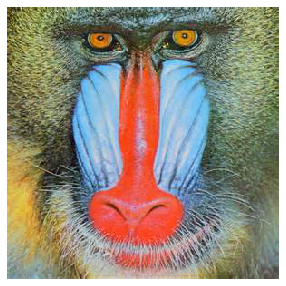

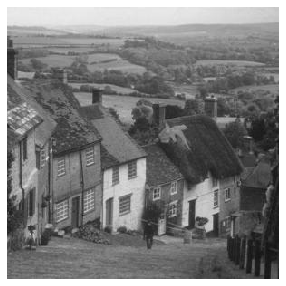

In [5]:
# You can change these paths to point to your own images if you want to try them out for fun.
# If you do, you must include these image files in your submission.
image1_path = './image1.jpg'
image2_path = './image2.jpg'

def display(img):
    # Show image
    plt.figure(figsize = (5,5))
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    
image1 = load(image1_path)
image2 = load(image2_path)

display(image1)
display(image2)

## Exercise 1: dimming

Recall from lecture that the value of each pixel represents its brightness. Implement a function that takes in an image and returns the same image, but half as bright as the original image.

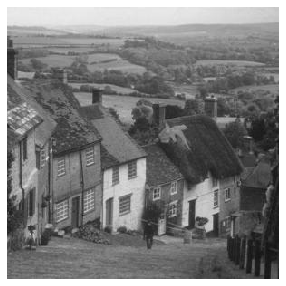

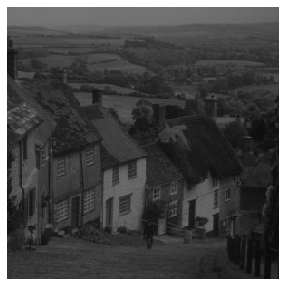

In [7]:
def dim_image(img):
    '''img is an image, represented as a 2D numpy array.'''

    out = img.copy()
    
    for r in range(len(img)):
        for c in range(len(img[r])):
            out[r][c] = img[r][c] / 2
    
    return out

dim_image2 = dim_image(image2)
display (image2)
display (dim_image2)

In [13]:
image2

array([[[0.89803922, 0.89803922, 0.89803922],
        [0.89803922, 0.89803922, 0.89803922],
        [0.89803922, 0.89803922, 0.89803922],
        ...,
        [0.78823529, 0.78823529, 0.78823529],
        [0.78823529, 0.78823529, 0.78823529],
        [0.78431373, 0.78431373, 0.78431373]],

       [[0.90196078, 0.90196078, 0.90196078],
        [0.90196078, 0.90196078, 0.90196078],
        [0.90588235, 0.90588235, 0.90588235],
        ...,
        [0.78039216, 0.78039216, 0.78039216],
        [0.78039216, 0.78039216, 0.78039216],
        [0.78039216, 0.78039216, 0.78039216]],

       [[0.90588235, 0.90588235, 0.90588235],
        [0.90588235, 0.90588235, 0.90588235],
        [0.90980392, 0.90980392, 0.90980392],
        ...,
        [0.77647059, 0.77647059, 0.77647059],
        [0.77647059, 0.77647059, 0.77647059],
        [0.77647059, 0.77647059, 0.77647059]],

       ...,

       [[0.41568627, 0.41568627, 0.41568627],
        [0.41568627, 0.41568627, 0.41568627],
        [0.41960784, 0

## Exercise 2: convert to gray scale

Implement a function that takes in an RGB color image and outputs that same image in grayscale.

Hint: You may want to look at the documentation for skimage.color to see if there is something useful there.

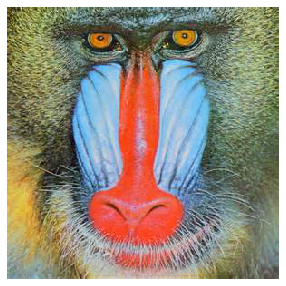

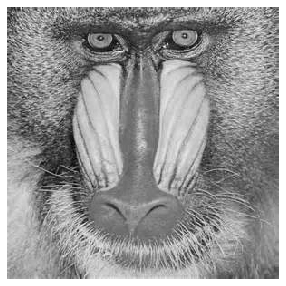

In [8]:
def convert_to_grayscale(img):
    '''img is a RBG image, represented as a 2D numpy array.'''

    out = skimage.color.rgb2gray(img)
    return out

display(image1)    
grey_image = convert_to_grayscale(image1)
display(grey_image)

## Exercise 3: RGB exclusion

In the video we watched, we saw that you can represent a color image with a 2-dimensional array of pixels, where the R, G, and B pixels are grouped next to each other, and that this is how LCD screens are implemented.

In numpy, the representation is slightly different -- instead of having one 2-dimensional array, we have 3, and each one represents the brightness of the R, G, and B channels.

Implement a function that takes in an image and a channel, and returns an image without the specified channel.

Below is the image without the red channel.


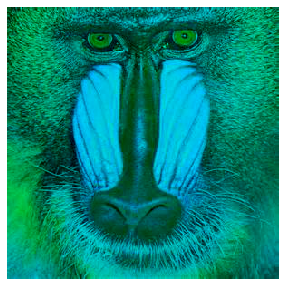

Below is the image without the green channel.


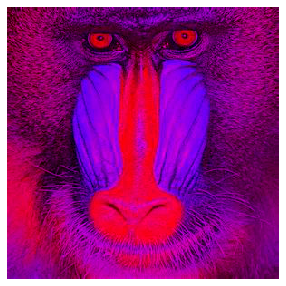

Below is the image without the blue channel.


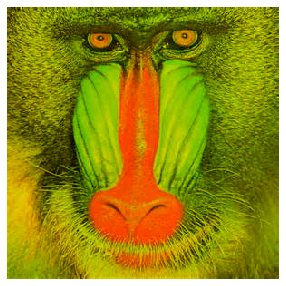

In [9]:
without_red = decomp(image1, "RGB", "R")
without_blue = decomp(image1, "RGB", "B")
without_green = decomp(image1, "RGB", "G")

print("Below is the image without the red channel.")
display(without_red)

print("Below is the image without the green channel.")
display(without_green)

print("Below is the image without the blue channel.")
display(without_blue)

## Advanced exercise #1: LAB color space

RGB is not the only way that we can represent colors. In this advanced exercise, we'll explore the LAB and HSV color spaces.

Implement a function that takes in an image and an LAB channel, and returns an image without the specified channel. Again, you may want to look at the skimage.color module to see if there's something in there that can help you.

In [10]:
# convert image to l*a*b color space
image1_lab = color.rgb2lab(image1)

# remove a channel
image_l = decomp(image1_lab, "LAB", "L")
image_a = decomp(image1_lab, "LAB", "A")
image_b = decomp(image1_lab, "LAB", "B")

# convert back to rgb to display better
image_l = color.lab2rgb(image_l)
image_a = color.lab2rgb(image_a)
image_b = color.lab2rgb(image_b)


print("Below is the image without the L channel.")
display(image_l)

print("Below is the image without the A channel.")
display(image_a)

print("Below is the image without the B channel.")
display(image_b)

NameError: name 'color' is not defined

## Advanced exercise 1a

**Explain what the L, A and B channels are and what happens when you take away the L and A channels.**

The L channel represents the lightness of the color; a 0 value corresponds to black, and 100 white. This is why when we remove the L channel by setting all the values to 0, the image turns black. The slight red and blue hints left over are likely a product of the rgb &rarr; l\*a\*b\* &rarr; rgb conversion.

The A channel indicates where the color falls on the red/green spectrum; negative values are more green and positive values are more red. When we take away this channel by setting the value to 0, it removes all red and green from the image, leaving it entirely blue and yellow (the yellow/blue spectrum is controlled by the B channel). Again, the visual display is not perfect because of the conversions.

The problem with taking away the L and A channels at the same time is the image becomes black, so there is no visual difference between -LA and -L. But if you were to then increase the L channel slightly after taking away both, the image would show as only yellow/blue.

## Advanced exercise 2: HSV exploration

**Explain what the H, S and V channels are and what happens when you take away the both the H and S channels.**
It may help you to implement a function that performs HSV decomposition and removes these channels; this is optional.

The H, S, and V channels indicate respectively the hue, saturation, and value of the color. Hue means the color (i.e., blue or red or green); saturation means how saturated the color is (i.e., white, faded blue, regular blue); value is the darkness of the color (i.e., dark blue, regular blue). It's weird to think about because you cannot achieve a white on the V channel, you have to use the S channel. And weird colors will be considered fully "saturated," for example the darker turquoise colors. The image below shows the HSV cylinder, which is how this color space is represented.

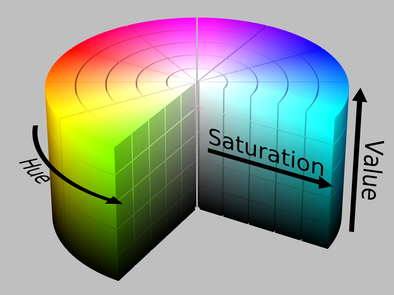

Removing the H and S channels at the same time will have the same effect as just removing the S channel. Because setting all H values turns the image redscale, removing the S channel on top of that will have the same effect as removing the S channel on a fully colored image.

In [ ]:
# convert image to hsv color space
image1_hsv = color.rgb2hsv(image1)

# remove a channel
image_h = decomp(image1_hsv, "HSV", "H")
image_s = decomp(image1_hsv, "HSV", "S")
image_v = decomp(image1_hsv, "HSV", "V")

# convert back to rgb to display better
image_h = color.hsv2rgb(image_h)
image_s = color.hsv2rgb(image_s)
image_v = color.hsv2rgb(image_v)


print("Below is the image without the H channel.")
display(image_l)

print("Below is the image without the S channel.")
display(image_a)

print("Below is the image without the V channel.")
display(image_b)

## Advanced exercise 3: combining images

Implement the following method, which takes in two images and returns a new image where the left half of the image is the left half of image1 and the right half of the image is the right half of image2. Exclude the specified channel for the given image. 

You should see the left half of the monkey without the red channel and the right half of the house image with no green channel.

In [ ]:
def mix_images(image1, image2, space1, space2, channel1, channel2):
    """
    Args:
        image1: numpy array of shape(image_height, image_width, 3).
        image2: numpy array of shape(image_height, image_width, 3).
        channel1: str specifying channel used for image1.
        channel2: str specifying channel used for image2.

    Returns:
        out: numpy array of shape(image_height, image_width, 3).
    """
    
    out1 = image1.copy()
    out2 = image2.copy()
    out = np.zeros((len(image1), len(image1[0]), 3))
    
    if channel1 == space1[0]:
        exclude1 = 0
    elif channel1 == space1[1]:
        exclude1 = 1
    else:
        exclude1 = 2
        
    if channel2 == space2[0]:
        exclude2 = 0
    elif channel2 == space2[1]:
        exclude2 = 1
    else:
        exclude2 = 2

    for r in range(len(out)):
        for c in range(int(len(out[r])/2)):
            out[r][c] = out1[r][c]
            out[r][c][exclude1] = 0
        for c in range(int(len(out[r])/2), len(out[r])):
            out[r][c] = out2[r][c]
            out[r][c][exclude2] = 0

    return out
    

image_mixed = mix_images(image1, image2, space1="RGB", space2="RGB", channel1='R', channel2='G')
display(image_mixed)

## Advanced exercise 4: exploration

Implement a function that takes a single image, and performs a different operation to each of the 4 quadrants of the image, returning an image that merges the 4 quadrants back together.

For example, you might remove a channel or two from one quadrant, dim or brighten another quadrant, etc.